<p style="text-align: center;" ><font size="+3"><u><b>Laboratory 3 Part 2: Linear Systems Theory Applied to Optical Imaging Systems</u></b></p>

<p style="text-align: left;" ><font size="+1"><b>Group #: ___________   Team Members: _______________  </b></p>

<p style="text-align: left;" ><font size="+1"><b>Measure the Point Spread Function of a Microscope</b></p>

<div class="alert alert-block alert-warning">
<font color='black'>

The microscope has been set up using 8” of optical tube (plus the filter wheel and aperture). We have placed two targets on the stage - the resolution target and a pinhole target. In addition, the glass diffuser have been removed from setup. Instead, as shown in the photo below, a piece of plastic has been placed underneath the resolution target to function as the diffuser. 
     </font> 
</div>

<img src="stage.png" style="width:500px">

<div class="alert alert-block alert-success">
<font color='black'>
1. Move the stage to find the resolution target. As you have done previously, compute the pixel size, magnification, and sampling frequency and report below:
         </font> 
</div>

In [1]:
# Import and instantiate all classes
from lighting import Lighting
from pololu import Pololu
from camera import Camera

l = Lighting()
m = Pololu()
c = Camera()
l.set_intensity(10)
c.open()
f_wheel,stage_y,stage_x,ap,stage_z = 1,2,3,4,5
m.set_position(ap, 2496, blocking = True) # wide aperture

# computer: imaging-5
c.set_exposure(10)

Light control initialized successfully.
Servo control initialized successfully.
Load uc480 library..
ThorCam opened successfully.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, clear_output

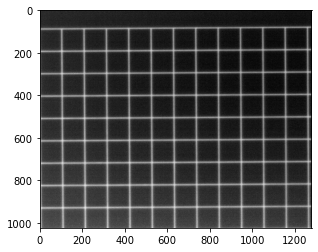

In [49]:
m.set_position(stage_x,2496, blocking = True)
m.set_position(stage_z, 1500, blocking = True) # best z = 1500
m.set_position(stage_y, 700, blocking = True)
m.set_position(ap, 2496)
img = c.capture().copy()
plt.figure()
plt.imshow(img, cmap='gray')


In [50]:
np.save("Lab3_Grid.npy", img)

In [69]:
plt.figure()
x = plt.imshow(np.load('Lab3_Grid.npy'),cmap='gray')
plt.colorbar(x, shrink=0.8)
plt.title("Grid Image")
plt.xlabel("x pixels")
plt.ylabel("y pixels")

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Text(0, 0.5, 'y pixels')

104 pixels per 100 micrometer segment. 
$\frac{100 \mu m}{104  pixels} = 0.96 \frac{\mu m}{pixel}$

$M = \frac{5.3}{0.96} = 5.51$

The magnification is 5.51 X.

<div class="alert alert-block alert-warning">
<font color='black'>

Now find the pinhole. The pinhole lets through very little light and can be difficult to find. Thus, you will go through a very specific process to be able to find the pinhole and collect good data. <br/> <br/>

First, set your system to the “no filter” setting. Turn up the LED illuminator to the maximum setting. Also, the illuminator will get warm while in use. Remember to turn off the illuminator after each data collection.<br/><br/>

Set the camera exposure to something long like 1000 ms. (To do this you will likely need to reduce the framerate below 1 frame/second by setting `c.set_framerate()`). You may need to tweak this exposure setting to get good (unsaturated) data. Set up your system in a continuous display loop as you have in previous labs and start searching for the pinhole. Having your axes aligned and moving slowly will be critical to find the pinhole. Similarly, you will need to be somewhat close to focus in order to see the pinhole. In this lab, it may be helpful to use `cmap='jet'` to visualize your data.<br/><br/>
    
Once you have found the pinhole, change your live image to display only a 200 x 200 pixel region around the pinhole. Change the filter to filter 2 (“green” 540 nm). Attempt to get the image focused as best as you can. If the image is saturated, adjust the exposure accordingly. <br/><br/>
    
You may notice that the background isn’t entirely dark. Recall from Lab 1 that even when no light hits the detector you can read non-zero values. We will need to correct for this. Without changing any part of the setup, turn off the illuminator from the wall and collect 50 dark frames to subtract from your data. (We will not be conducting an air scan to normalize the data.) Turn the illuminator back on when finished.

</font> 
</div>

<div class="alert alert-block alert-success">
<font color='black'>

2. Center your pinhole as best as you can within a 200 x 200 zoomed image at the best focus you can achieve. (Hint, the best focus will have the highest value at the center of the pinhole.) Average 100 images to obtain an image of your pinhole. <br/><br/>  
    
Paste that image below. Additionally, re-window (using caxis) your data to show as many sidelobes as you can in your data, and show that image as well.  Also, save your data (e.g. `np.save('wide_aperture.npy', mean_image)`).
</font> 
</div>

In [35]:
l.set_intensity(30)
c.set_exposure(500)
m.set_position(stage_x, 750, blocking=True)
m.set_position(stage_y, 1050, blocking=True)
m.set_position(stage_z, 1600, blocking=True)
m.set_position(f_wheel, 1170, blocking=True)

imgs = []
for i in range(100):
    imgs.append(c.capture().copy()[325:525,400:600])
pinhole = np.stack(imgs)
pinhole = np.mean(pinhole, axis = 0) 
np.save("AvgPinhole.npy", pinhole)

Text(0, 0.5, 'y position values (mm)')

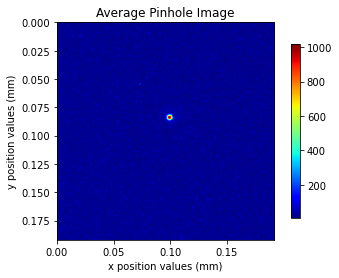

In [73]:
%matplotlib inline

p = np.load("AvgPinhole.npy")
x=plt.imshow(p, cmap='jet',extent=[0,200*0.96/1000,200*0.96/1000,0])
plt.colorbar(x,shrink=0.8)
plt.title("Average Pinhole Image")
plt.xlabel("x position values (mm)")
plt.ylabel("y position values (mm)")

In [30]:
l.set_intensity(0)
dark = []
for i in range(50):
    dark.append(c.capture().copy()[325:525,400:600])
D = np.stack(dark)
D = np.mean(D, axis = 0) 
np.save("Dark", D)

Text(0, 0.5, 'y position values (mm)')

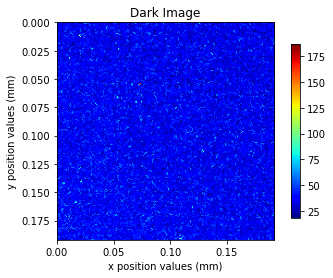

In [76]:
%matplotlib inline

d = np.load("Dark.npy")
x=plt.imshow(d, cmap='jet',extent=[0,200*0.96/1000,200*0.96/1000,0])
plt.colorbar(x,shrink=0.8)
plt.title("Dark Image")
plt.xlabel("x position values (mm)")
plt.ylabel("y position values (mm)")

In [37]:
p = np.load("AvgPinhole.npy")
d = np.load("Dark.npy")
p = p-d
np.save("wide_aperture", p)

Text(0, 0.5, 'y position values (mm)')

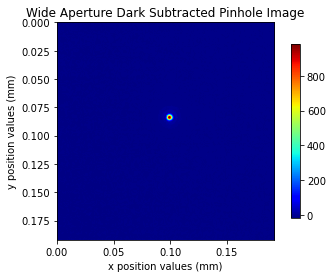

In [77]:
%matplotlib inline

p = np.load("wide_aperture.npy")
x=plt.imshow(p, cmap='jet',extent=[0,200*0.96/1000,200*0.96/1000,0])
plt.colorbar(x, shrink=0.8)
plt.title("Wide Aperture Dark Subtracted Pinhole Image")
plt.xlabel("x position values (mm)")
plt.ylabel("y position values (mm)")

(0.1, 0.07)

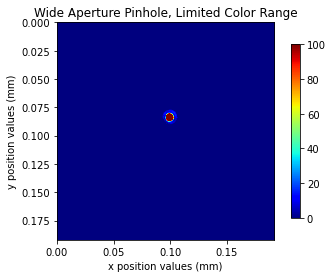

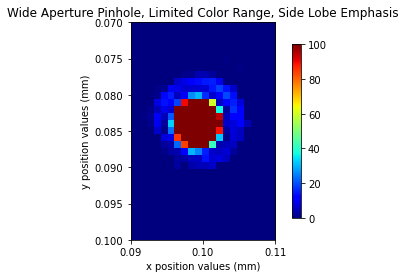

In [89]:
%matplotlib inline
p = np.load("wide_aperture.npy")
x=plt.imshow(p, cmap='jet', clim=[0,100],extent=[0,200*0.96/1000,200*0.96/1000,0])
plt.colorbar(x, shrink=0.8)
plt.title("Wide Aperture Pinhole, Limited Color Range")
plt.xlabel("x position values (mm)")
plt.ylabel("y position values (mm)")
plt.figure()
x=plt.imshow(p, cmap='jet', clim=[0,100],extent=[0,200*0.96/1000,200*0.96/1000,0])
plt.colorbar(x, shrink=0.8)
plt.title("Wide Aperture Pinhole, Limited Color Range, Side Lobe Emphasis")
plt.xlabel("x position values (mm)")
plt.ylabel("y position values (mm)")
plt.xlim(.09,.11)
plt.ylim(.1,.07)
# x=plt.imshow(p, cmap='jet', clim=[0,100],extent=[0,200*0.96/1000,200*0.96/1000,0])
# plt.title("Zoomed In Wide Aperture Pinhole, Limited Color Range")
# plt.xlabel("x position values (mm)")
# plt.ylabel("y position values (mm)")
# plt.colorbar(x, shrink=0.8)
# plt.xlim(75,125)
# plt.ylim(50,100)

<div class="alert alert-block alert-success">
<font color='black'>

3. Repeat the above experiment with two additional aperture settings (medium and small). (Note that you should not have to change focus, but changing the exposure time will require new dark frame data.) Save `medium_aperture.npy` and `small_aperture.npy` as well. 
</font> 
</div>

<img src="Lab3\aperture.png" style="width:800px">
Example aperture position: wide open (100% open), medium aperture (60% open), small aperture (30% open)

In [47]:
l.set_intensity(30)
c.set_exposure(500)
m.set_position(ap, 1500)
m.set_position(stage_x, 750, blocking=True)
m.set_position(stage_y, 1050, blocking=True)
m.set_position(stage_z, 1600, blocking=True)
m.set_position(f_wheel, 1170, blocking=True)
imgs = []
for i in range(100):
    imgs.append(c.capture().copy()[325:525,400:600])
pinhole = np.stack(imgs)
pinhole = np.mean(pinhole, axis = 0) 

l.set_intensity(0)
dark = []
for i in range(50):
    dark.append(c.capture().copy()[325:525,400:600])
D = np.stack(dark)
D = np.mean(D, axis = 0) 
med_ap = pinhole-D
np.save("medium_aperture", med_ap)

Text(0, 0.5, 'y position values (mm)')

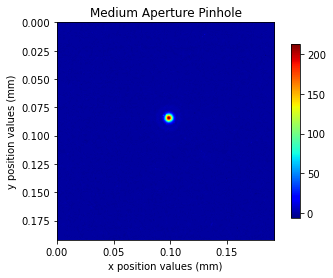

In [90]:
%matplotlib inline
med = np.load("medium_aperture.npy")
x=plt.imshow(med, cmap='jet',extent=[0,200*0.96/1000,200*0.96/1000,0])
plt.colorbar(x, shrink=0.8)
plt.title("Medium Aperture Pinhole")
plt.xlabel("x position values (mm)")
plt.ylabel("y position values (mm)")

In [3]:
l.set_intensity(30)
c.set_exposure(999)
m.set_position(ap, 1100)
m.set_position(stage_x, 750, blocking=True)
m.set_position(stage_y, 1050, blocking=True)
m.set_position(stage_z, 1600, blocking=True)
m.set_position(f_wheel, 1170, blocking=True)
imgs = []
for i in range(100):
    imgs.append(c.capture().copy()[325:525,400:600])
pinhole = np.stack(imgs)
pinhole = np.mean(pinhole, axis = 0) 

l.set_intensity(0)
dark = []
for i in range(50):
    dark.append(c.capture().copy()[325:525,400:600])
D = np.stack(dark)
D = np.mean(D, axis = 0) 
small_ap = pinhole-D
np.save("small_aperture", small_ap)

Text(0, 0.5, 'y position values (mm)')

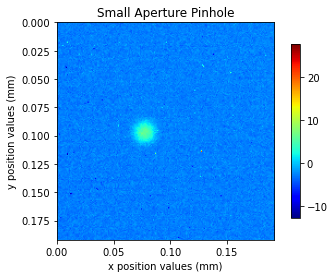

In [92]:
%matplotlib inline
small = np.load("small_aperture.npy")
x=plt.imshow(small, cmap='jet',extent=[0,200*0.96/1000,200*0.96/1000,0])
plt.colorbar(x, shrink=0.8)
plt.title("Small Aperture Pinhole")
plt.xlabel("x position values (mm)")
plt.ylabel("y position values (mm)")

<div class="alert alert-block alert-success">
<font color='black'>

4. Show the averaged, 200 x 200 images (both normal and “zoomed” caxis) below. Discuss the effect of aperture on the appearance of the pinhole.
</font> 
</div>

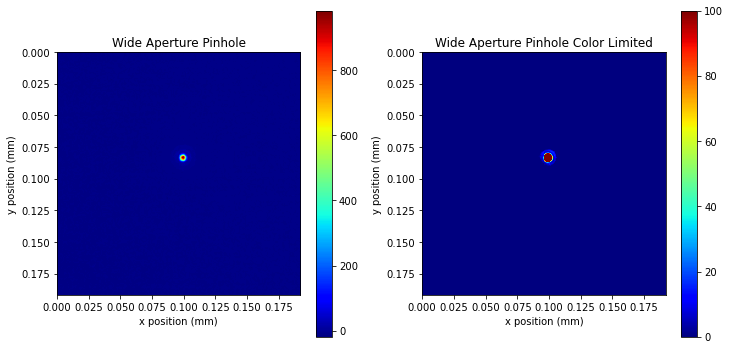

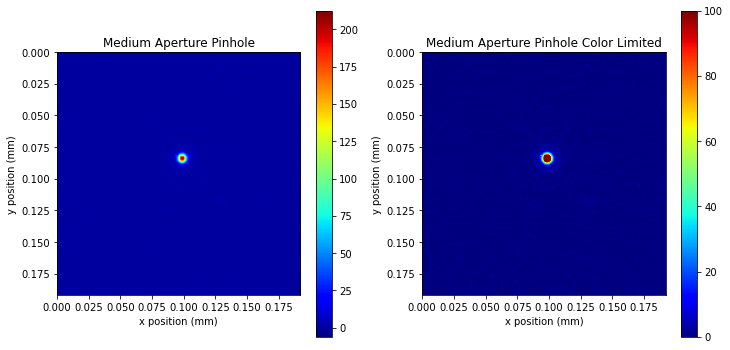

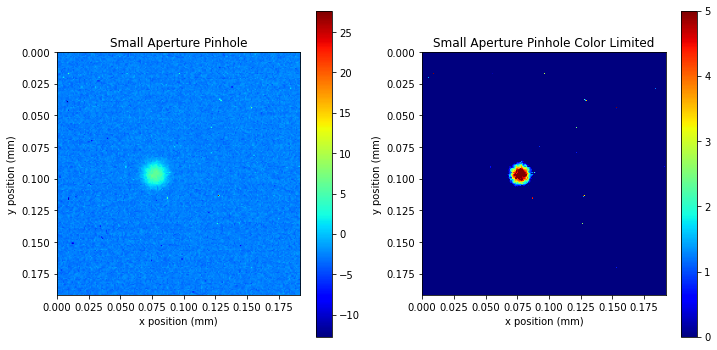

In [3]:
def generate_lobe_image(input_file_name, figure_title, color_limit):
    fig, ax = plt.subplots(ncols=2,figsize=(12,12))
    left = np.ravel(ax)[0].imshow(np.load(input_file_name),cmap='jet',extent=[0,200*0.96/1000,200*0.96/1000,0])
    ax[0].set_title(figure_title)
    ax[0].set_xlabel("x position (mm)")
    ax[0].set_ylabel("y position (mm)")
    plt.colorbar(left,ax=np.ravel(ax)[0],shrink=0.5)
    right = np.ravel(ax)[1].imshow(np.load(input_file_name),cmap='jet',clim=[0,color_limit],extent=[0,200*0.96/1000,200*0.96/1000,0])
    ax[1].set_title(figure_title + " Color Limited")
    ax[1].set_xlabel("x position (mm)")
    ax[1].set_ylabel("y position (mm)")
    plt.colorbar(right,ax=np.ravel(ax)[1],shrink=0.5)
generate_lobe_image('wide_aperture.npy', 'Wide Aperture Pinhole',100)
generate_lobe_image('medium_aperture.npy', 'Medium Aperture Pinhole',100)
generate_lobe_image('small_aperture.npy', 'Small Aperture Pinhole',5)

As we are decrease the aperture size, the size of the pinhole appears larger. This increase in appearance size can be attributed to the fact that the decrease in size of the aperture decreases the size of the pupil function. Since the point spread function is the fourier transform of the autocorrelation of the pupil function, the point spread function has an increased spread. Because the optical transfer function is related to the fourier transform of the point spread function, when you relate the pupil function to the optical transfer function, the OTF is directly related to the autocorrelation of the pupil function. Thus, when the spread of the pupil function is decreased, the spread of the OTF is decreased. Because the image output is related to the inverse fourier transform of the OTF, the image output will exhibit greater spread at lower aperture sizes. 

<div class="alert alert-block alert-success">
<font color='black'>

5. For your 3 data sets above (you saved data for wide, medium, and small apertures), estimate the diameter of the first dark ring around your pinhole images. Report each below with units:
</font> 
</div>

(0.095, 0.075)

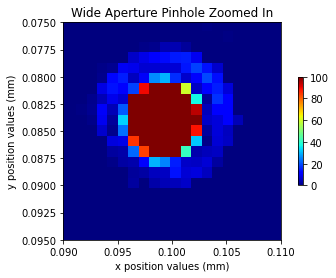

In [4]:
%matplotlib inline
# %matplotlib widget

wide = plt.imshow(np.load('wide_aperture.npy'),cmap='jet',clim=[0,100],extent=[0,200*0.96/1000,200*0.96/1000,0])
plt.title('Wide Aperture Pinhole Zoomed In')
plt.xlabel("x position values (mm)")
plt.ylabel("y position values (mm)")
plt.colorbar(wide,shrink=0.5)
plt.xlim(0.09,0.11)
plt.ylim(.095,.075)

(0.095, 0.075)

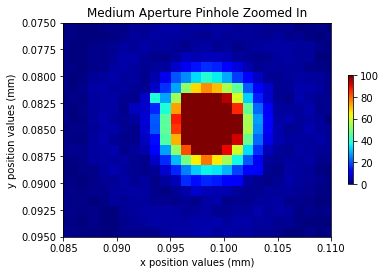

In [5]:
%matplotlib inline
# %matplotlib widget

medium = plt.imshow(np.load('medium_aperture.npy'),cmap='jet',clim=[0,100],extent=[0,200*0.96/1000,200*0.96/1000,0])
plt.title('Medium Aperture Pinhole Zoomed In')
plt.xlabel("x position values (mm)")
plt.ylabel("y position values (mm)")
plt.colorbar(medium,shrink=0.5)
plt.xlim(0.085,0.11)
plt.ylim(.095,.075)

(0.125, 0.075)

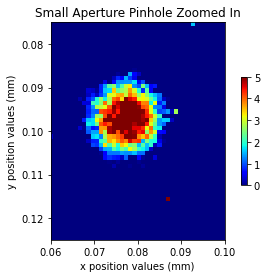

In [6]:
%matplotlib inline
# %matplotlib widget

small = plt.imshow(np.load('small_aperture.npy'),cmap='jet',clim=[0,5],extent=[0,200*0.96/1000,200*0.96/1000,0])
plt.title('Small Aperture Pinhole Zoomed In')
plt.xlabel("x position values (mm)")
plt.ylabel("y position values (mm)")
plt.colorbar(small,shrink=0.5)
plt.xlim(0.06,0.10)
plt.ylim(.125,.075)

Wide Aperture: $d = 0.0137 mm$

Medium Aperture: $d = 0.0172 mm $

Small Aperture: $d = 0.0212 mm$

<div class="alert alert-block alert-success">
<font color='black'>

6. For your 3 data sets above, show the absolute value of the Fourier transform of your data using `ax.plot_surface()`. What are you looking at? Describe what you see and estimate the “diameter” of the function you observe. (Note: If you have a “spike” at your DC value, talk to the instructors for a remedy.) </font> 
</div>

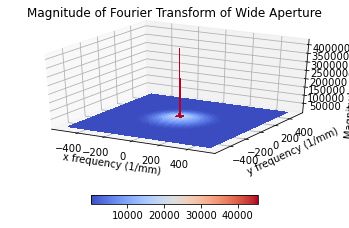

In [8]:
%matplotlib inline
from numpy.fft import fft2, fftshift, ifftshift
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import numpy as np
transformed_func = fftshift(fft2(ifftshift(np.load('wide_aperture.npy'))))
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
# Make data.
fs = 104 / 100 * 1000
X = np.linspace(-fs/2,fs/2*(200-2)/200,200)
Y = np.linspace(-fs/2,fs/2*(200-2)/200,200)
X, Y = np.meshgrid(X, Y)
#R = np.sqrt(X**2 + Y**2)
Z = np.abs(transformed_func)
# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
fig.colorbar(surf, shrink=0.5, aspect=20, orientation='horizontal')
ax.set_xlabel('x frequency (1/mm)')
ax.set_ylabel('y frequency (1/mm)')
ax.set_zlabel('Magnitude of F. Transform')
ax.set_title('Magnitude of Fourier Transform of Wide Aperture')
plt.show()

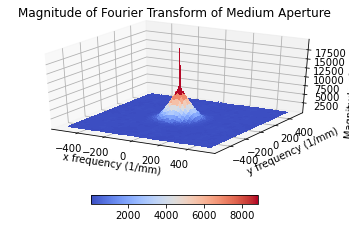

In [9]:
transformed_func = fftshift(fft2(ifftshift(np.load('medium_aperture.npy'))))
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
# Make data.
fs = 104 / 100 * 1000
X = np.linspace(-fs/2,fs/2*(200-2)/200,200)
Y = np.linspace(-fs/2,fs/2*(200-2)/200,200)
X, Y = np.meshgrid(X, Y)
#R = np.sqrt(X**2 + Y**2)
Z = np.abs(transformed_func)
# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
fig.colorbar(surf, shrink=0.5, aspect=20, orientation='horizontal')
ax.set_xlabel('x frequency (1/mm)')
ax.set_ylabel('y frequency (1/mm)')
ax.set_zlabel('Magnitude of F. Transform')
ax.set_title('Magnitude of Fourier Transform of Medium Aperture')
plt.show()

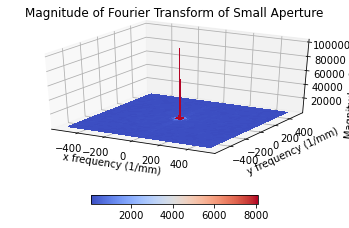

In [10]:
transformed_func = fftshift(fft2(ifftshift(np.load('small_aperture.npy'))))
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
# Make data.
fs = 104 / 100 * 1000
X = np.linspace(-fs/2,fs/2*(200-2)/200,200)
Y = np.linspace(-fs/2,fs/2*(200-2)/200,200)
X, Y = np.meshgrid(X, Y)
#R = np.sqrt(X**2 + Y**2)
Z = np.abs(transformed_func)
# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
fig.colorbar(surf, shrink=0.5, aspect=20, orientation='horizontal')
ax.set_xlabel('x frequency (1/mm)')
ax.set_ylabel('y frequency (1/mm)')
ax.set_zlabel('Magnitude of F. Transform')
ax.set_title('Magnitude of Fourier Transform of Small Aperture')
plt.show()

<div class="alert alert-block alert-success">
<font color='black'>

7. Return to the wide open aperture scenario with a centered pinhole, 200 x 200 image and switch to filter 1 ("blue" 460 nm). Choose an appropriate exposure and dark-correct your data. **Show** a best-focus image, windowed image to see sidelobes, and the magnitude of the Fourier transform of this image. Save your image data. Additionally, estimate the diameter of the first dark ring in the image and the diameter of the Fourier-domain function. Show all of this below and discuss the relation to the in-focus filter 2 case.  </font> 
</div>

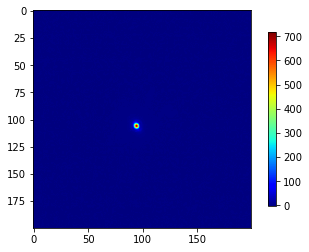

In [165]:
l.set_intensity(63)
c.set_exposure(250)
m.set_position(ap, 2496, blocking = True)
m.set_position(stage_x, 750, blocking=True)
m.set_position(stage_y, 1050, blocking=True)
m.set_position(stage_z, 1700, blocking=True) # 1700 good for blue
m.set_position(f_wheel, 1270, blocking=True)

imgs = []
for i in range(100):
    imgs.append(c.capture().copy()[450:650,385:585])
pinhole = np.stack(imgs)
pinhole = np.mean(pinhole, axis = 0) 

l.set_intensity(0)
dark = []
for i in range(50):
    dark.append(c.capture().copy()[450:650,385:585])
D = np.stack(dark)
D = np.mean(D, axis = 0) 
blue_wide_ap = pinhole  -D
np.save("blue_wide_ap", blue_wide_ap)

x = plt.imshow(blue_wide_ap,cmap='jet')
plt.colorbar(x, shrink=0.8)

(0.12, 0.08)

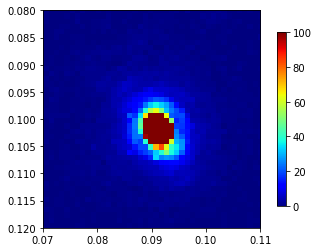

In [174]:
%matplotlib inline
blue_wide_ap = np.load('blue_wide_ap.npy')
x = plt.imshow(blue_wide_ap,cmap='jet',clim=[0,100],extent=[0,200*0.96/1000,200*0.96/1000,0])
plt.colorbar(x,shrink=0.8)
plt.xlim(0.07,0.11)
plt.ylim(.12,.08)

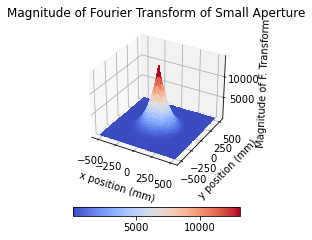

In [183]:
%matplotlib inline
transformed_func = fftshift(fft2(ifftshift(blue_wide_ap)))
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
# Make data.
fs = 104 / 100 * 1000
X = np.linspace(-fs/2,fs/2*(200-2)/200,200)
Y = np.linspace(-fs/2,fs/2*(200-2)/200,200)
X, Y = np.meshgrid(X, Y)
Z = np.abs(transformed_func)
# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
fig.colorbar(surf, shrink=0.5, aspect=20, orientation='horizontal')
ax.set_xlabel('x position (mm)')
ax.set_ylabel('y position (mm)')
ax.set_zlabel('Magnitude of F. Transform')
ax.set_title('Magnitude of Fourier Transform of Small Aperture')
plt.show()

<div class="alert alert-block alert-success">
<font color='black'>

8. Defocus your pinhole image at three different levels of defocus (showing different ring behavior around the pinhole). Average 100 frames, save this data and show below. Describe general trends in the defocused data. </font> 
</div>

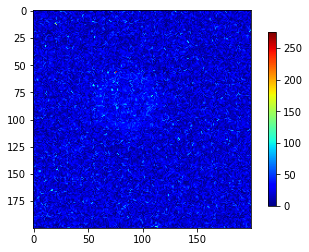

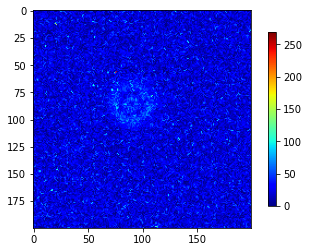

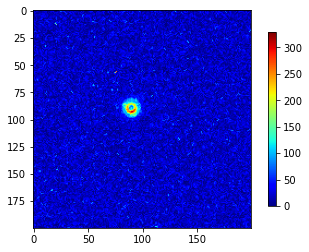

In [30]:
z_pos = [2300, 2150, 1900]
blur_imgs = []
l.set_intensity(0)
dark = []
for i in range(50):
    dark.append(c.capture().copy()[325:525,400:600])
D = np.stack(dark)
D = np.mean(D, axis = 0) 

l.set_intensity(30)
for z in z_pos:
    m.set_position(stage_z, z, blocking = True)
    temp_blur_imgs = []
    for i in range(100):
        temp_blur_imgs.append(c.capture().copy()[325:525,400:600])
    avg = np.stack(temp_blur_imgs)
    avg = np.mean(avg, axis = 0) 
    blur_imgs.append(avg)
for i in range(len(blur_imgs)):
    blue_defoc = blur_imgs[i] -D
    np.save("blue_defoc" + str(i), blue_wide_ap)
    plt.figure()
    x = plt.imshow(blur_imgs[i],cmap='jet')
    plt.colorbar(x, shrink=0.8)
    


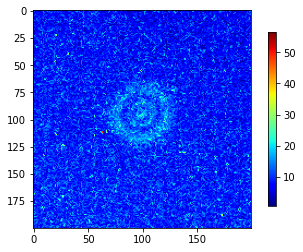

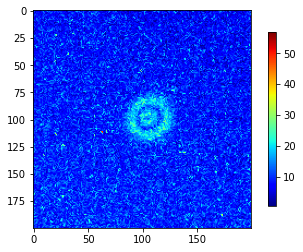

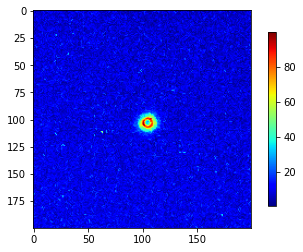

In [193]:
c.set_exposure(250)
z_pos = [2300, 2150, 1900]
blur_imgs = []
l.set_intensity(0)
dark = []
for i in range(50):
    dark.append(c.capture().copy()[450:650,385:585])
D = np.stack(dark)
D = np.mean(D, axis = 0) 

l.set_intensity(63)
for z in z_pos:
    m.set_position(stage_z, z, blocking = True)
    temp_blur_imgs = []
    for i in range(100):
        temp_blur_imgs.append(c.capture().copy()[450:650,385:585])
    avg = np.stack(temp_blur_imgs)
    avg = np.mean(avg, axis = 0) 
    blur_imgs.append(avg)
for i in range(len(blur_imgs)):
    blue_defoc = blur_imgs[i] -D
    np.save("blue_defoc" + str(i), blue_defoc)
    plt.figure()
    x = plt.imshow(blur_imgs[i],cmap='jet')
    plt.colorbar(x, shrink=0.8)
    


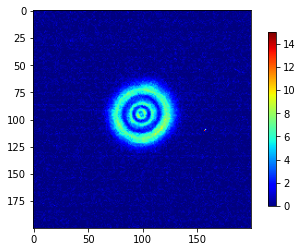

In [198]:
x = plt.imshow(np.load('blue_defoc0.npy'),clim=[0,15],cmap='jet')
plt.colorbar(x,shrink=0.8)

- diameter
- slowly getting more focused 
- the more focused, the smaller the diameter, the greater the intensity
- more contrast in the widest visible ring

<div class="alert alert-block alert-success">
<font color='black'>

9. Move the stage to center your microscope on the center of the star pattern. Acquire a best focus image at good exposures for both filter 1 and filter 3 ("orange" 600 nm) using a 200 x 200 zoomed image region. Show both images and describe what you see – note any differences and interpret the data in light of the other experiments you have conducted.  </font> 
</div>

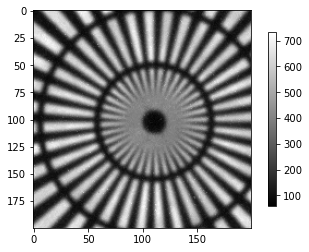

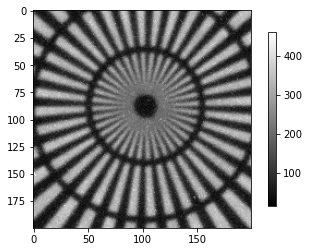

In [65]:
l.set_intensity(63)
c.set_exposure(750)
m.set_position(stage_x,1925, blocking = True)
m.set_position(stage_z, 1450, blocking = True) # best z = 1500
m.set_position(stage_y, 700, blocking = True)
m.set_position(f_wheel, 1050, blocking=True) # Filter 3 (orange)
m.set_position(ap, 2496)
img = c.capture().copy()[390:590,300:500]
plt.figure()
x = plt.imshow(img, cmap='gray')
plt.colorbar(x, shrink=0.8)
np.save('OrangeStar',img)

c.set_exposure(999)
m.set_position(stage_z, 1600, blocking = True)
m.set_position(f_wheel, 1280, blocking = True) # Filter 1 (blue)
img = c.capture().copy()[390:590,300:500]
plt.figure()
x = plt.imshow(img, cmap='gray')
plt.colorbar(x, shrink=0.8)
np.save("BlueStar", img)